In [85]:
#Import all the packages we would possably use

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import patsy
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import statsmodels.formula.api as smf

In [86]:
#Create a database

cars = pd.read_csv('cars.csv')

cars.set_index('YEAR',inplace=True)

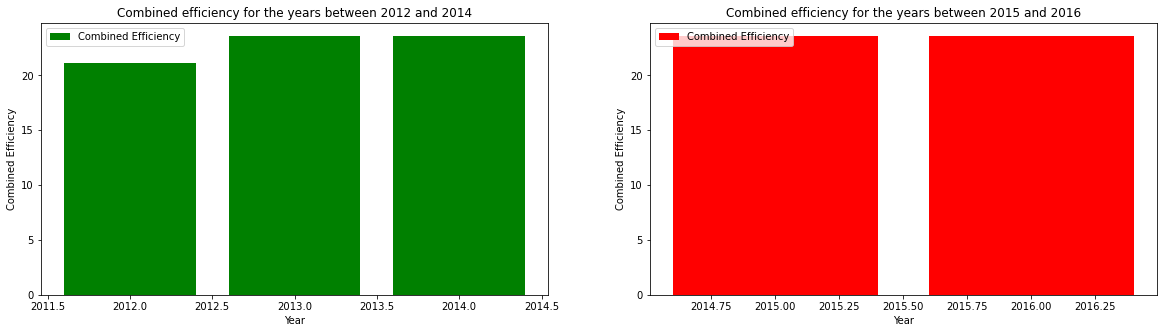

In [87]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

plot_color2 = 'green'
plot_color3 = 'lightgreen'
plot_color4 = 'blue'

#The distribution of the highway efficiencies the years 

above = cars.loc[2012:2014,:]
below = cars.loc[2015:2016,:]

ax[0].bar(above.index,above['COMB (kWh/100 km)'],color='green',label='Combined Efficiency')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Combined Efficiency')
ax[0].set_title('Combined efficiency for the years between 2012 and 2014')
ax[0].legend()


ax[1].bar(below.index,below['COMB (kWh/100 km)'],color='red',label='Combined Efficiency')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Combined Efficiency')
ax[1].set_title('Combined efficiency for the years between 2015 and 2016')
ax[1].legend()


#plt.savefig('cars3.jpg',bbox_inches='tight')


plt.show()

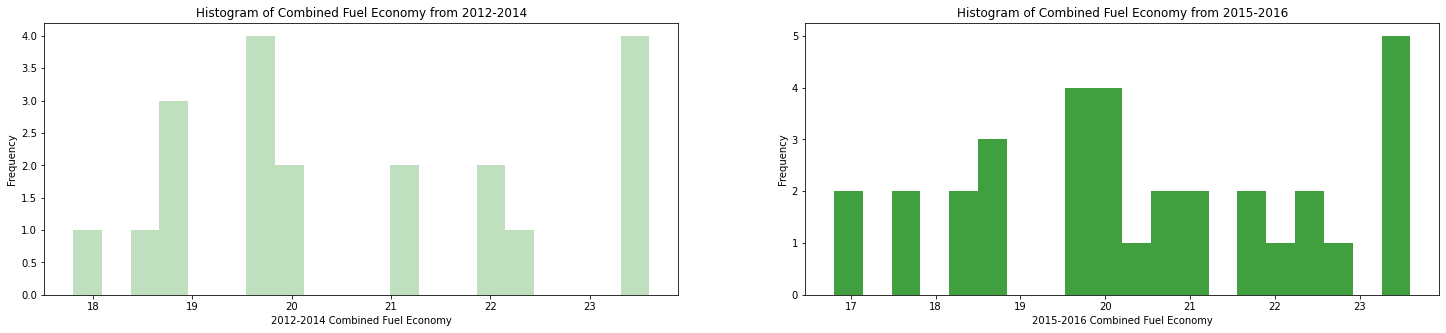

In [88]:
fig, ax = plt.subplots(1,2,figsize=(25,5))

plot_color2 = 'green'
plot_color3 = 'lightgreen'
plot_color4 = 'blue'

#The distribution of the combined efficiencies for all the years

above = cars.loc[2012:2014,:]
below = cars.loc[2015:2016,:]

ax[0].hist(above['COMB (kWh/100 km)'].dropna(), bins=20, color=plot_color2, alpha=0.25)        
ax[0].set_xlabel('2012-2014 Combined Fuel Economy')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Combined Fuel Economy from 2012-2014')


ax[1].hist(below['COMB (kWh/100 km)'].dropna(), bins=20, color=plot_color2, alpha=0.75)        
ax[1].set_xlabel('2015-2016 Combined Fuel Economy')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Combined Fuel Economy from 2015-2016')


                 
plt.savefig('cars6.jpg',bbox_inches='tight')

                 
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


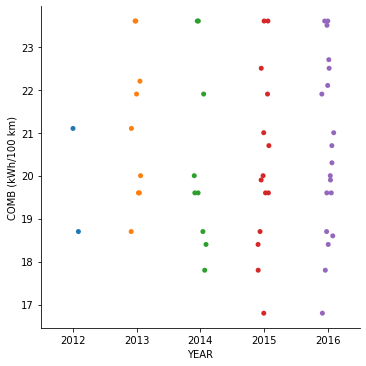

In [64]:
#Scatter plot of the different years and their Combined Fuel Economy

sns.catplot(cars.index, y='COMB (kWh/100 km)', data=cars)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


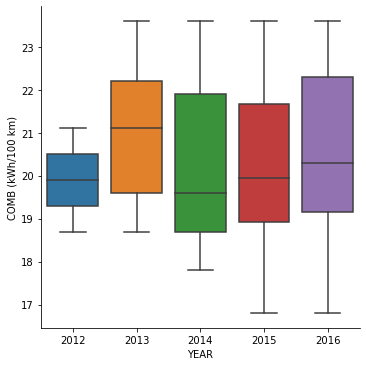

In [65]:
#Boxplot of the years and the combined fuel economy

sns.catplot(cars.index, y='COMB (kWh/100 km)', kind="box", data=cars)

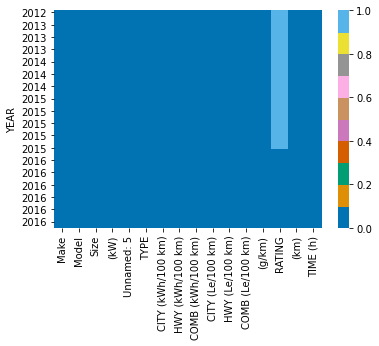

In [66]:
#Heatmap to find missing values

sns.heatmap(cars.isnull(), cmap=sns.color_palette(palette='colorblind'))
plt.show()

In [67]:
#Create a missing indicator for columns with missing values

col=cars.columns[:]
for col in cars.columns:
    missing=cars[col].isnull()
    num_missing=missing.sum()
    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        cars['{}_ismissing'.format(col)]=missing

created missing indicator for: RATING


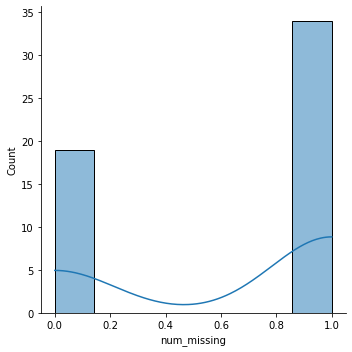

In [68]:
#Create a distribution graph to show the frequency of missing values for each row

ismissing_cols=[col for col in cars.columns if 'ismissing' in col]
cars['num_missing']=cars[ismissing_cols].sum(axis=1)
sns.displot(data=cars, x='num_missing', kde=True)
plt.show()

In [69]:
#Show what percent of values are missing in each column

for col in cars.columns:
    pct_missing=cars[col].isnull().mean()
    print('{} - {}%'.format(col, round(pct_missing*100)))
print(pct_missing)

Make - 0%
Model - 0%
Size - 0%
(kW) - 0%
Unnamed: 5 - 0%
TYPE - 0%
CITY (kWh/100 km) - 0%
HWY (kWh/100 km) - 0%
COMB (kWh/100 km) - 0%
CITY (Le/100 km) - 0%
HWY (Le/100 km) - 0%
COMB (Le/100 km) - 0%
(g/km) - 0%
RATING - 64%
(km) - 0%
TIME (h) - 0%
RATING_ismissing - 0%
num_missing - 0%
0.0


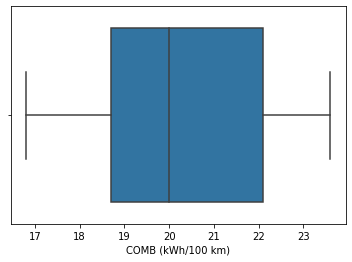

In [70]:
#Create a box plot to show the distribution of our dependent variable

sns.boxplot(data=cars, x='COMB (kWh/100 km)')
plt.show()

In [71]:
#Show descriptive statistics for our dependant variable

cars['COMB (kWh/100 km)'].describe()

count    53.000000
mean     20.541509
std       1.979455
min      16.800000
25%      18.700000
50%      20.000000
75%      22.100000
max      23.600000
Name: COMB (kWh/100 km), dtype: float64

In [72]:
#Show all unique values in Unnamed: 5 column

cars['Unnamed: 5'].unique()

array(['A1'], dtype=object)

<AxesSubplot:>

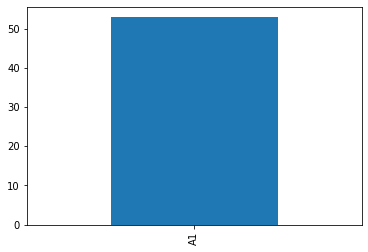

In [73]:
#Create bar graph to show amount of each unique value in the Unnamed: 5 column

cars['Unnamed: 5'].value_counts().plot.bar()

In [74]:
#Show all unique values in Type column

cars['TYPE'].unique()

array(['B'], dtype=object)

<AxesSubplot:>

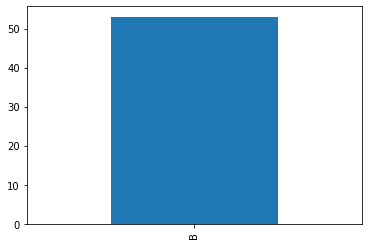

In [75]:
#Create bar graph to show amount of each unique value in the Type column

cars['TYPE'].value_counts().plot.bar()

In [76]:
#Show all unique values in (g/km) column

cars['(g/km)'].unique()

array([0])

<AxesSubplot:>

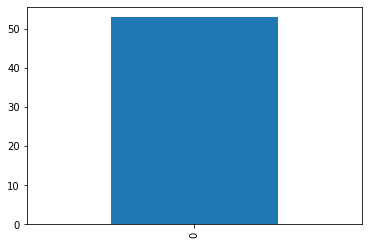

In [77]:
#Create bar graph to show amount of each unique value in the (g/km) column

cars['(g/km)'].value_counts().plot.bar()

In [78]:
#Show columns that have over 95% of the same values in the column

num_rows=len(cars.index)
low_information_cols=[]

for col in cars.columns:
    cnts=cars[col].value_counts(dropna=False)
    top_pct =(cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()
    


Unnamed: 5: 100.00000%
A1    53
Name: Unnamed: 5, dtype: int64

TYPE: 100.00000%
B    53
Name: TYPE, dtype: int64

(g/km): 100.00000%
0    53
Name: (g/km), dtype: int64



In [79]:
#Create a dummy variable for cars made before 2015

cars = pd.read_csv('cars.csv')
cars.Before_2015 = 0
cars.loc[(cars.YEAR < 2015) , 'Before_2015'] = 1
cars.loc[(cars.YEAR >= 2015) , 'Before_2015'] = 0

#Drop unneeded columns

cars=cars.drop(['Unnamed: 5', 'TYPE', '(g/km)', 'RATING'], axis=1)

#Rename table columns

cars=cars.rename(columns={'YEAR': 'Year', 'CITY (kWh/100 km)': 'City_kWh', 'HWY (kWh/100 km)': 'Hwy_kWh', 'COMB (kWh/100 km)': 'Comb_kWh', 'CITY (Le/100 km)': 'City_Le', 'HWY (Le/100 km)': 'Hwy_Le', 'COMB (Le/100 km)': 'Comb_Le', 'TIME (h)': 'Time'})
cars.head()

,Year,Make,Model,Size,(kW),City_kWh,Hwy_kWh,Comb_kWh,City_Le,Hwy_Le,Comb_Le,(km),Time,Before_2015
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,16.9,21.4,18.7,1.9,2.4,2.1,100,7,1.0
1,2012,NISSAN,LEAF,MID-SIZE,80,19.3,23.0,21.1,2.2,2.6,2.4,117,7,1.0
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,19.0,21.1,20.0,2.1,2.4,2.2,122,4,1.0
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,16.9,21.4,18.7,1.9,2.4,2.1,100,7,1.0
4,2013,NISSAN,LEAF,MID-SIZE,80,19.3,23.0,21.1,2.2,2.6,2.4,117,7,1.0


In [80]:
#Run a regression for our research question

cars_model_1=smf.ols('Comb_kWh ~ Before_2015 + Size', data=cars) 
results1=cars_model_1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:               Comb_kWh   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     29.94
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           6.36e-15
Time:                        12:07:59   Log-Likelihood:                -64.962
No. Observations:                  53   AIC:                             145.9
Df Residuals:                      45   BIC:                             161.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [81]:
#Create a regression table based on our regression that we ran

table = summary_col([results1], model_names=['Before vs After 2015'], stars=True, regressor_order=['Intercept', 'Before_2015', 'Size'], float_format='%0.2f', drop_omitted=False)
table.add_title('Are Newer Cars More Efficient?')
print(table.as_text())

          Are Newer Cars More Efficient?
                              Before vs After 2015
--------------------------------------------------
Intercept                     19.64***            
                              (0.47)              
Before_2015                   0.71***             
                              (0.26)              
Size[T.STATION WAGON - SMALL] 0.26                
                              (0.79)              
Size[T.SUV - STANDARD]        3.46***             
                              (0.79)              
Size[T.TWO-SEATER]            -0.40               
                              (0.55)              
Size[T.SUBCOMPACT]            -1.88***            
                              (0.53)              
Size[T.FULL-SIZE]             2.47***             
                              (0.49)              
Size[T.MID-SIZE]              -0.67               
                              (0.58)              
R-squared                     0.82       

In [82]:
#Find the mean of our dummy variable to see what percent of the cars are made before 2015

cars['Before_2015'].mean()

0.37735849056603776